## Bisection Method

Any equation in variable $x$ can be written in the form of $f(x)=0$. Thus, finding the solution to an equation equals finding the **roots** (or zeros) of the function. The algorithm is simple:
* Given the initial pair of points $x_1$ and $x_2$, find $f(x_1)$ and $f(x_2)$ and check that they have opposite signs. Choose the target accuracy $\epsilon$ for the root.
* Calculate the midpoint $x^\prime=(x_1+x_2)/2$ and subsequently $f(x^\prime)$.
* If $f(x^\prime)$ has the same sign as $f(x_1)$, then set $x_1=x^\prime$. Otherwise, set $x_2=x^\prime$.
* If $|x_1-x_2|>\epsilon$, repeat from step 2. Else calculate the midpoint once more and this is the root.

The distance $\Delta$ is halved at each step. Thus, the number of steps to reach the target accuracy is
$$ N = \log_2\left(\frac{\Delta}{\epsilon}\right) $$
This method is very fast, but has some disadvantages:
* if there is no root between $x_1$ and $x_2$
* if there are even number of roots
* even-order polynomials like $(1-x)^2$ or $(2-3x)^4$
* solving multiple simultaneous equations -- relaxation method has an upper hand over bisection in this regard!

## Newton's Method

Starting with a guess $x$, the formula for the new guess is given by
$$ x^\prime = x - \frac{f(x)}{f^\prime(x)} $$
If the true root of a function is $x^*$, then the current guess $x$ varies by an error value $\epsilon$ as: $x^* = x + \epsilon$. The accuracy of the new guess is given by:
$$ \epsilon = \frac{f^{\prime\prime}}{2f^\prime(x)} (x^*-x)^2 = \frac{f^{\prime\prime}}{2f^\prime(x)} \epsilon^2 $$ 
Thus, this method has **quadratic convergence** and hence, is very fast.  
Assume that the true root is $x^*$. Then, starting with the guess $x$, such that $x^* = x+\epsilon$, if you arrive at new guess $x^\prime$, such that $x^* = x^\prime+\epsilon^\prime$. This tells us that, 
$$
\begin{align}
x + \epsilon =& x^\prime + \epsilon^\prime \\
x^\prime - x =& \epsilon - \epsilon^\prime = \epsilon - c\epsilon^2 \sim \epsilon \quad ({\rm if}\ \epsilon\ {\rm is\ very\ small})
\end{align}
$$
Thus, the error in the previous step gives us an estimate of the accuracy in the current step.  
Disadvantages:
* Need to know the derivative
* May not converge if $f^\prime(x)$ is too small (see the expression for $\epsilon$ above)
* Slope may be in the wrong direction, leading to divergence of the solution

## Sixth-degree Legendre Polynomial

$$P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1 $$

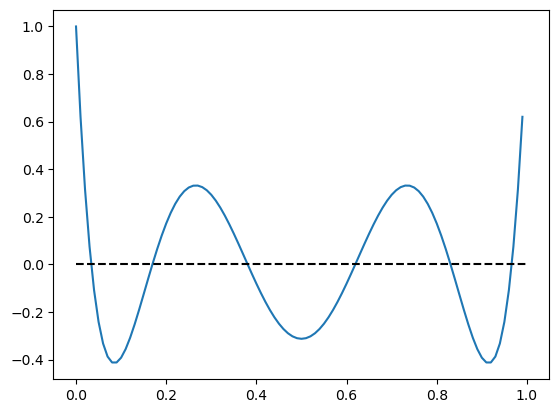

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def P6(x):
    return 924*(x**6) - 2772*(x**5) + 3150*(x**4) - 1680*(x**3) + 420*x*x - 42*x + 1.

x = np.arange(0,1,0.01)
plt.plot(x,P6(x))
plt.plot([0,1],[0,0],'k--')

In [2]:
def dP6(x):   # defining the derivative function for P6
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x*x + 840*x - 42

# Finding roots (or nodes) using Newton's method
x0    = np.array([0.,0.2,0.4,0.6,0.8,1.0])      # initial guesses, looking at the figure above
eps   = 1e-10 # target accuracy
delta = np.inf
max_iter = 1000 # stop after 1000 iterations if solution does not converge

while np.max(delta)>eps:
    p6  = P6(x0)    # compute the function at x0s
    dp6 = dP6(x0)   # compute derivatives
    x0  = x0 - p6/dp6   # new guess
    delta = p6/dp6
print(x0)

[0.03376524 0.16939531 0.38069041 0.61930959 0.83060469 0.96623476]


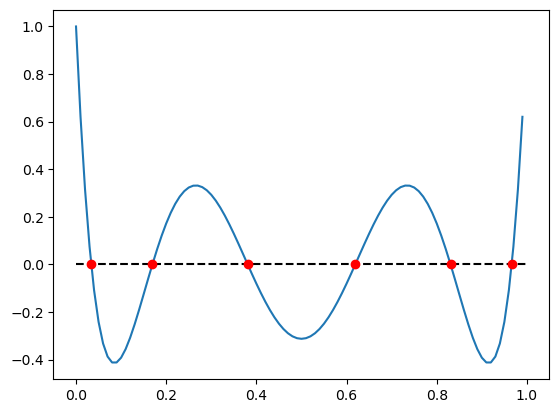

In [3]:
plt.plot(x,P6(x))
plt.plot([0,1],[0,0],'k--')
plt.plot(x0,P6(x0),ls='',marker='o',color='r')

**Now go back to Gaussian Quadrature, where we tried to fit a Legendre polynomial to a function in order to integrate it. Does that code make sense now?**

If the derivative of the function cannot be obtained analytically, one has to rely on numerical differentiation (which has its own issues due to subtraction). This leads us to the **secant method**:
$$ x_3 = x_2 - f^\prime(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)}$$
This again requires us to guess 2 initial points. However, it is as fast as Newton-Raphson, with similar disadvantages, but does not rely on a form for the derivative.

* For **two or more variables**, Newton's method of root finding boils down to finding a Jacobian matrix (consisting of partial derivatives of the function) and solving for the simultaneous linear equations (using Gaussian elimination). The solution of linear equation can be used to update the initial guess and proceed.
* **Finding maxima or minima** boils down to finding the root of the  derivative: $ f^\prime(x) =0$. However, there are no known methods to tell the local extremas apart from the global extremas.
* **Golden ratio search** is another beautiful method for finding extremas, explained in section 6.4.1 in the book.
* **Gauss-Newton method and gradient descent** -- an approximate version of Newton's method applied to finding minima including approximating the double derivative of the function by a constant: $x^\prime = x - \gamma f^\prime(x)$ -- the guess gets closer to true solution by a factor of the gradient -- hence, gradient descent. If $\gamma>0$, $x$ converges to a minima and if $\gamma<0$, $x$ converges to a maxima.

# Try it yourself

### Total 4 marks

Complete the following code for bisection method and find $\lambda_{\rm max}$ corresponding to the sun's blackbody radiation.

### Blackbody Radiation

The intensity of radiation per unit area per unit wavelength is given by the Planck's radiation law:
$$ I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_B T}-1} $$
Use bisection method to prove Wien's law:
$$ \lambda_{max} = \frac{b}{T} $$
The wavelength at which the distribution peaks can be found by taking the derivative of the distribution function and setting it to zero. This also happens to be a transcendental equation:
$$ 5e^{-x} + x - 5 = 0 $$
where $x=hc/\lambda k_B T$.

Text(0.5, 0, '$\\lambda$')

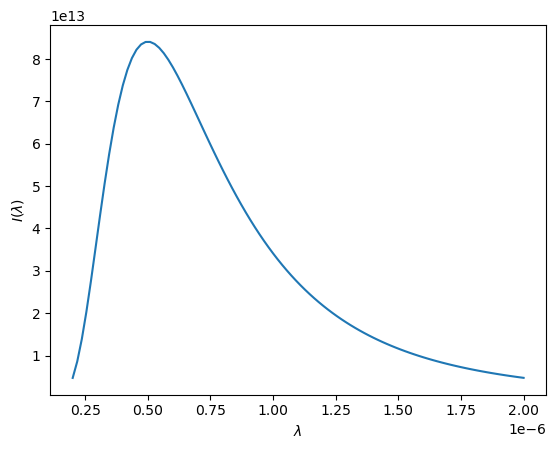

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# constants
h  = 6.626e-34   # Planck's constant
c  = 3e8         # speed of light
kb = 1.38e-23    # Boltzmann's constant
T  = 5800        # peak temperature of sun

wavelength = np.array(np.linspace(2e-7,2e-6,100))

def I(w):
    return 2*np.pi*h*c*c*pow(w,-5)/(np.exp(h*c/w/kb/T) - 1)

plt.plot(wavelength, I(wavelength))
plt.ylabel('$I(\lambda)$')
plt.xlabel('$\lambda$')

In [5]:
eps = 1e-6   # accuracy of root
N   = 100    # maximum number of iterations to allow the roots to converge

# this is the function that holds the derivative of the intensity function above
def f(x):
    return 5*np.exp(-x)+x-5

def bisection_method(f, a, b):
    # compute f(a) and f(b)
    fa, fb = f(a), f(b)
    
    # check if they have the same sign or different signs
    sign = f(a)*f(b)
    
    # if the sign is same, throw an error saying the choice of a and b is incorrect
    if sign>0:
        print("Error: the choice of a and b is incorrect!")
    
    x1, x2 = a, b
    for i in range(N):    # how long should this go on?
        # calculate midpoint of a and b
        xmid = 0.5*(x1+x2)
        fmid = f(xmid)
        
        # add the conditions and update the values
        if abs(x1-x2)>eps:
            if(fmid*fa>0):
                x1 = xmid
            else:
                x2 = xmid
        else:
            break
        

    return  0.5*(x1+x2)# return the root

# call the function with your choice of root bracketing range
x0 = bisection_method(f,1,8)
print(x0)

4.965114533901215


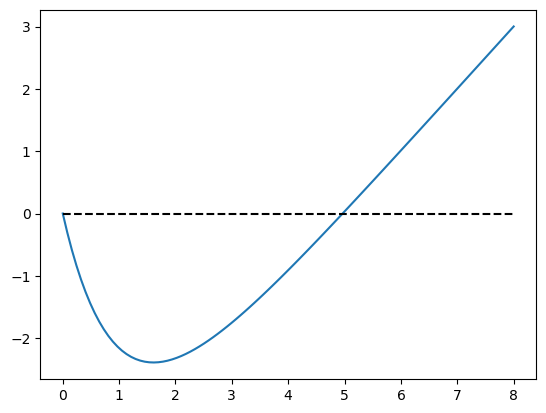

In [6]:
# Checking if this makes sense
x = np.linspace(0,8,100)
plt.plot(x,5*np.exp(-x)+x-5)
plt.plot(x,np.zeros(100),'k--')

In [7]:
print(r"Peak wavelength for sun is {:.2f} nm".format(h*c/kb/x0/T/1e-9))

Peak wavelength for sun is 500.19 nm
